In [1]:
! pip install -q  opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhilasha2003
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 7.21MB/s]


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import pandas as pd

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r'/content/weather-dataset-rattle-package/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='RainTomorrow', ylabel='count'>

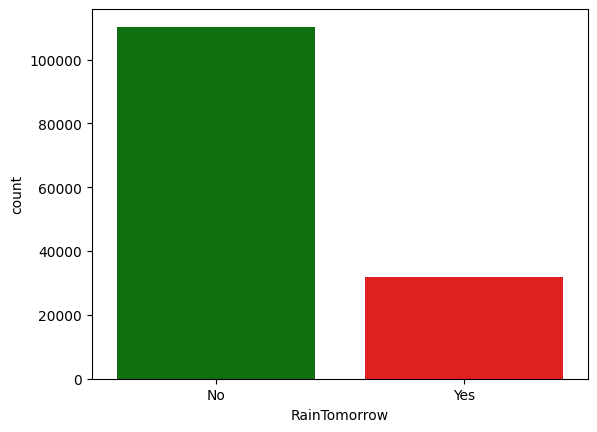

In [11]:
import seaborn as sns
col=['green','red']
sns.countplot(x=df['RainTomorrow'], palette=col)

In [12]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [13]:
df['RainTomorrow'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459     True
Name: RainTomorrow, Length: 145460, dtype: bool

In [14]:
df['RainTomorrow'].isnull().sum()

3267

In [15]:
df['Rainfall'].isnull().sum()

3261

<Axes: xlabel='RainToday', ylabel='count'>

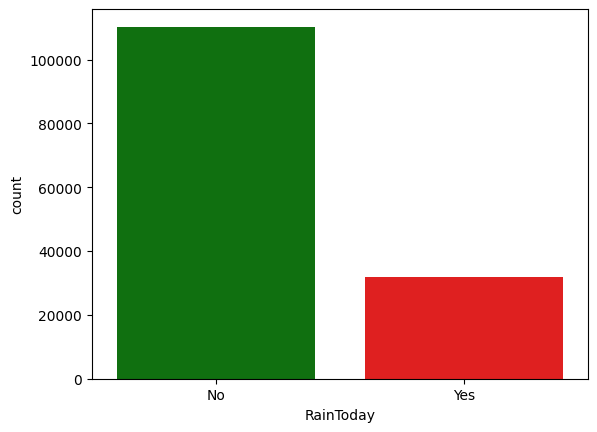

In [16]:

col1=['green','red']
sns.countplot(x=df['RainToday'], palette=col1)

<Axes: xlabel='WindGustDir', ylabel='count'>

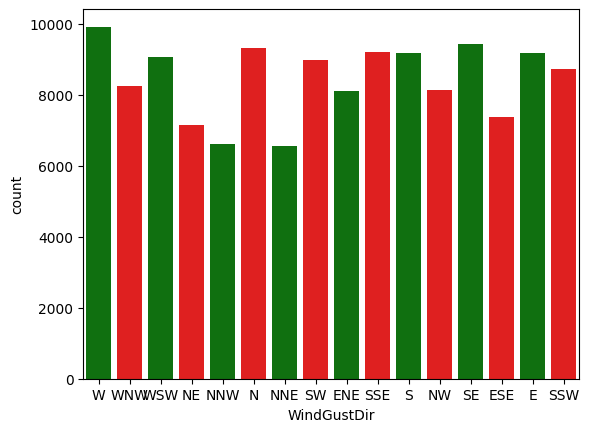

In [17]:
col2=['green','red']
sns.countplot(x=df['WindGustDir'], palette=col2)

<Axes: xlabel='WindGustSpeed', ylabel='count'>

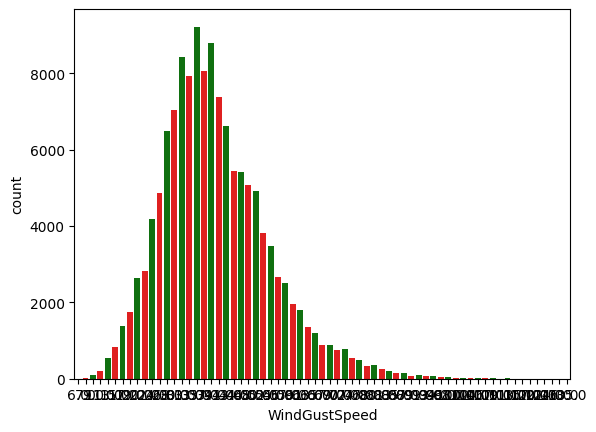

In [18]:
col3=['green','red']
sns.countplot(x=df['WindGustSpeed'], palette=col3)

<Axes: xlabel='Cloud9am', ylabel='count'>

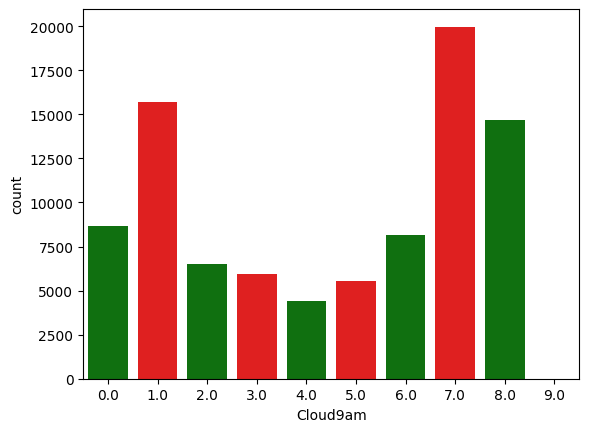

In [19]:
col4=['green','red']
sns.countplot(x=df['Cloud9am'], palette=col4)

<Axes: xlabel='Cloud3pm', ylabel='count'>

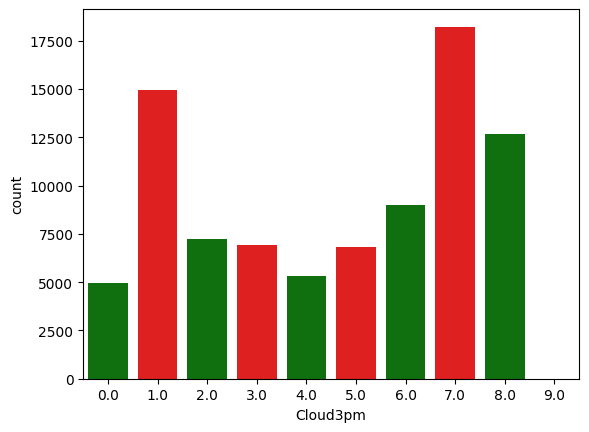

In [20]:
col5=['green','red']
sns.countplot(x=df['Cloud3pm'], palette=col5)

In [21]:
df['Date'].unique()

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [22]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [23]:
df['Rainfall'].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00,
       8.000e-01, 6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01,
       1.800e+00, 8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01,
       2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01,
       4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00,
       5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01,
       7.000e+00, 2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01,
       6.600e+01, 1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01,
       1.860e+01, 7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00,
       4.000e+00, 2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01,
       1.900e+01, 2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01,
       1.920e+01, 1.880e+01, 1.480e+01, 1.200e+01, 

In [24]:
df['Sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  7.4, 10. ,  2.3,  6.6,  0.3, 10.7, 11.6, 10.2,  9. ,
       12. ,  3. ,  7.9, 11.5, 11.2,  4.8,  5.8,  6. , 11.1, 11.8, 11.4,
       10.8,  7.8, 11. ,  5.5,  4.7,  4.2,  4.4,  6.2,  9.8,  9.9,  4.3,
        8. ,  9.6, 10.4,  9.3,  8.7,  7.6,  7.5, 10.1,  6.3,  2.8,  0.7,
        9.4,  9.7,  0.6,  5.1,  8.3,  4.1,  3.9,  6.8,  8.6,  2.7,  8.2,
        3.1,  1.8,  0.1,  0.8,  3.4,  7.1,  5. ,  5.7,  6.1,  7. ,  2.9,
        2.5,  4.6,  8.9,  9.1,  1.7,  8.1,  9.5,  1.2,  1.4,  8.8,  2.2,
        3.5,  9.2,  1.9, 11.7, 11.9,  7.7,  0.9, 12.5,  2.1, 12.8, 13.7,
        8.5,  0.2,  4. ,  2.4,  5.2,  0.5,  6.4,  4.5,  1.1,  2. ,  0.4,
        1.5,  3.3,  6.5,  2.6,  3.8,  3.6,  3.2,  6.7,  5.4,  7.2,  4.9,
        1. ,  1.6,  5.3,  7.3,  5.6,  1.3, 13.8, 13.5, 14. , 13.9, 14.1,
       14.5, 14.3, 14.2])

In [25]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [26]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df['Humidity3pm'].unique()

array([ 22.,  25.,  30.,  16.,  33.,  23.,  19.,   9.,  27.,  91.,  93.,
        43.,  32.,  28.,  82.,  65.,  26.,  24.,  17.,  15.,  70.,  12.,
         8.,  31.,  20.,  10.,  21.,  39.,  13.,  11.,  69.,  18.,  14.,
        35.,  90.,  68.,  74.,  41.,  34.,  78.,  49.,  37.,  42.,  47.,
        52.,  29.,  86.,  89.,  62.,  79.,  48.,  46.,  38.,  44.,  51.,
        36.,  45.,  40.,  53.,  61.,  59.,  63.,  54.,  57.,  50.,  58.,
        75.,  97.,  80.,  95.,  56.,  72.,  60.,  71.,  73.,  81.,  76.,
        64.,  87.,  85.,  67.,  55.,  77.,  84.,   7.,  99.,  92.,  66.,
        83.,  94.,  96.,  88.,  nan, 100.,  98.,   5.,   6.,   1.,   4.,
         2.,   3.,   0.])

In [28]:
df['Humidity9am'].unique()

array([ 71.,  44.,  38.,  45.,  82.,  55.,  49.,  48.,  42.,  58.,  89.,
        76.,  65.,  57.,  50.,  69.,  80.,  47.,  56.,  54.,  41.,  78.,
        46.,  43.,  33.,  34.,  36.,  52.,  51.,  40.,  35.,  39.,  60.,
        37.,  27.,  32.,  53.,  20.,  66.,  63.,  62.,  87.,  61.,  59.,
        92.,  72.,  67.,  75.,  88.,  68.,  73.,  74.,  83.,  77.,  70.,
        81.,  86.,  97.,  99.,  91.,  85.,  93.,  84.,  94.,  79.,  98.,
        96.,  95.,  90.,  64.,  29.,  21., 100.,  nan,  24.,  25.,  31.,
        18.,  23.,  26.,  28.,  30.,  19.,  22.,  17.,  15.,   9.,  12.,
        13.,  16.,   6.,  10.,  14.,  11.,   7.,   8.,   5.,   3.,   2.,
         4.,   0.,   1.])

In [29]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.])

In [30]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [31]:
df['Pressure3pm'].unique()

array([1007.1  , 1007.8  , 1008.7  , 1012.8  , 1006.   , 1005.4  ,
       1008.2  , 1010.1  , 1003.6  , 1005.7  , 1004.2  ,  993.   ,
       1001.8  , 1010.3  , 1010.4  , 1002.2  , 1009.7  , 1017.1  ,
       1014.8  , 1008.1  , 1007.6  , 1001.7  , 1003.4  , 1005.1  ,
       1003.2  , 1013.1  , 1009.2  , 1006.7  , 1002.7  , 1010.9  ,
       1013.7  , 1006.8  , 1012.1  , 1006.9  , 1012.7  , 1017.4  ,
       1016.2  , 1010.6  , 1004.8  , 1005.9  ,  997.8  , 1003.9  ,
       1014.6  , 1014.1  , 1011.6  , 1011.8  , 1010.2  , 1010.5  ,
       1007.4  , 1004.7  , 1002.6  , 1005.   , 1003.8  , 1006.5  ,
       1008.5  , 1011.1  , 1017.3  , 1019.7  , 1016.4  , 1013.8  ,
       1013.5  , 1007.5  , 1004.5  , 1010.8  , 1012.4  , 1013.4  ,
       1015.   , 1012.6  , 1004.6  , 1009.   , 1012.   , 1014.7  ,
       1015.9  , 1018.   , 1018.9  , 1008.   , 1013.2  , 1013.9  ,
       1013.6  , 1014.4  , 1019.2  , 1017.2  , 1020.7  , 1020.6  ,
       1019.1  , 1019.5  , 1019.4  , 1018.4  , 1012.9  , 1019.

In [32]:
df['Pressure9am'].unique()

array([1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009.2, 1009.6, 1013.4,
       1008.9, 1007. , 1011.8, 1010.5,  994.3, 1001.2, 1009.7, 1012.2,
       1005.8, 1009.4, 1019.2, 1019.3, 1013.6, 1007.8, 1011. , 1012.9,
       1010.9, 1006.8, 1005.2, 1004.8, 1005.6, 1006.1, 1004.5, 1014.4,
       1018.7, 1015.1, 1012.6, 1011.9, 1017.8, 1009.9, 1014.1, 1015.7,
       1011.6, 1008.4, 1019.7, 1015.8, 1010.1, 1005.3, 1007.9, 1005.4,
       1016.5, 1017.7, 1014.9, 1014.6, 1014.2, 1012.5, 1011.7, 1008.8,
       1005.9, 1008. , 1008.2, 1009.3, 1012.8, 1017. , 1023.3, 1022.5,
       1016.2, 1017.2, 1012.4, 1015.6, 1013. , 1014. , 1016.6, 1007.5,
       1014.7, 1014.5, 1013.7, 1015.2, 1019.5, 1021.3, 1017.4, 1012.7,
       1013.3, 1016.3, 1014.8, 1019.1, 1023. , 1023.8, 1022.4, 1023.2,
       1022.6, 1018.8, 1019.8, 1020.4, 1021.8, 1026.7, 1027.1, 1024.2,
       1021.5, 1024.4, 1024.1, 1018.5, 1022.8, 1022.7, 1023.6, 1025.2,
       1026. , 1004. , 1013.8, 1018. , 1023.1, 1023.4, 1026.9, 1028.7,
      

<Axes: xlabel='Cloud3pm', ylabel='count'>

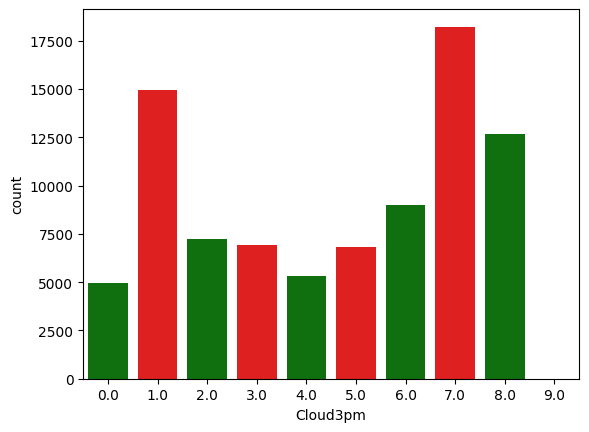

In [33]:
col5=['green','red']
sns.countplot(x=df['Cloud3pm'], palette=col5)

In [34]:
df.RainTomorrow.describe()


count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [35]:
df.Location.describe()


count       145460
unique          49
top       Canberra
freq          3436
Name: Location, dtype: object

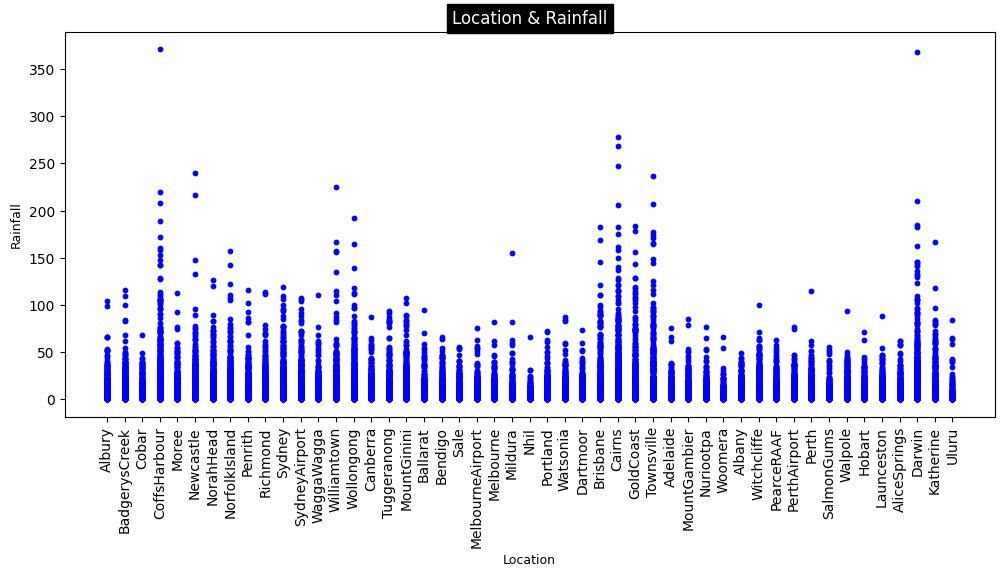

In [36]:
plt.figure(figsize=(12,5) , dpi=100) # size

plt.scatter(df['Location'] , df['Rainfall'] , color='blue' , marker='o' , s=10)    #coler , marker , s

plt.title('Location & Rainfall' , backgroundcolor='black' , color='white' , fontsize=12) #title
plt.xlabel('Location' , fontsize =9)
plt.ylabel('Rainfall' , fontsize =9)

plt.xticks(rotation=90)

plt.show()

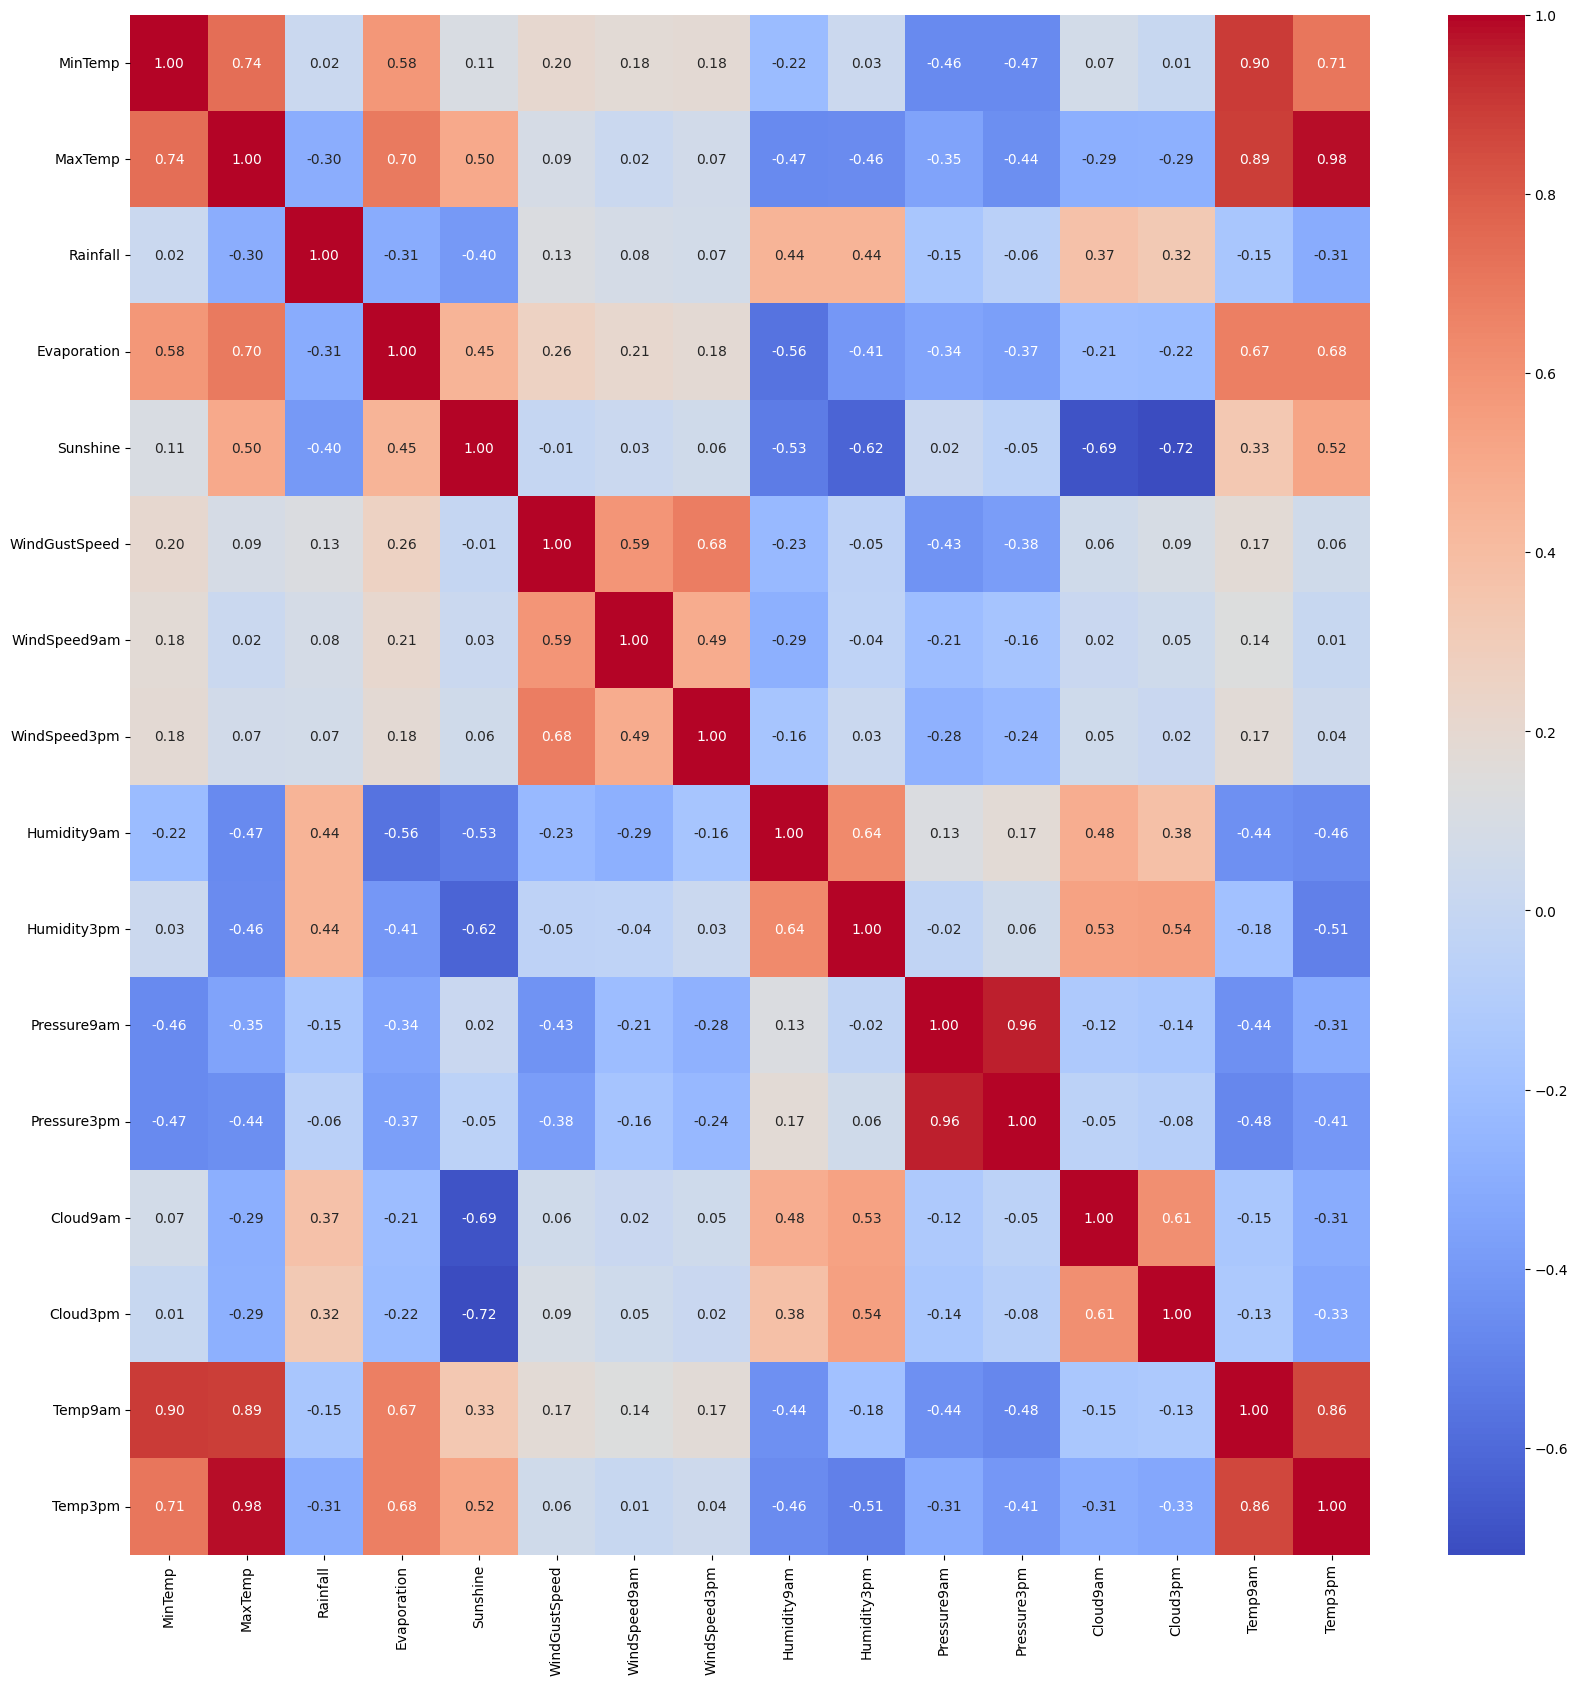

In [37]:
# Identify and exclude non-numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corrmat = df_numeric.corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
|